In [13]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')



In [14]:
df = pd.read_csv("C:/Users/20130368/Desktop/Python/Pratice Projects/Red Wine/winequality-red.csv")
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
1097,8.6,0.520,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5
189,7.9,0.490,0.32,1.9,0.082,17.0,144.0,0.99680,3.20,0.55,9.5,5
334,7.9,0.650,0.01,2.5,0.078,17.0,38.0,0.99630,3.34,0.74,11.7,7
887,10.7,0.520,0.38,2.6,0.066,29.0,56.0,0.99577,3.15,0.79,12.1,7
1553,7.3,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.4,5
429,12.8,0.840,0.63,2.4,0.088,13.0,35.0,0.99970,3.10,0.60,10.4,6
600,8.2,0.915,0.27,2.1,0.088,7.0,23.0,0.99620,3.26,0.47,10.0,4
806,8.4,0.250,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5,7
981,9.5,0.860,0.26,1.9,0.079,13.0,28.0,0.99712,3.25,0.62,10.0,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The data set has 11 columns.

Features:

1. Fixed Acidity - Measure of Fixed acidity of the wine. It is float type. Continuous Data.

2. Volatile Acidity - Measure of Volatile acidity (Gaseous Acids) of the wine. It is float type. Continuous Data.

3. Citric acid - Measure of Citric acid (Acid from Fruit i.e. Grapes) of the wine. It is float type. Continuous Data.

4. Residual Sugar - Measure of Residual Sugar after fermentation in the wine. It is float type. Continuous Data.

5. Chorides - Measure of Chlorides (Salts) in the Wine. It is float type. Continuous Data.

6. Free Sulphur Dioxide - Measure of Free Sulphur Dioxide in the wine. It is Float type. The Data seems to take only whole number i.e. Discrete Data.

7. Total Sulphur Dioxide -  Measure of Total Sulphur Dioxide in the wine. It is Float type. The Data seems to take only whole number i.e. Discrete Data.

8. Density - Is shows the density of the wine. It is float type. Continuous Data.

9. pH - pH value of the wine. It is float type. Continuous Data.

10. Suphates - Measure of Suphates in the wine. Sulphates help in preserving freshness of the wine. Float Type. Continuous Data.

11. Alcohol - Percentage of Alcohol content in the Wine. Float Type. Continuous Data.



Target / Label:

The Target is to determine the Wine Quality based on the features listed above. It is discrete Data.

The wine quality is ranked on a scale of 1-10. Hence, this is a multi-classification model.

In [16]:
# checking null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The primary inference:

1. There are no Null values in the data set.

2. The data seems to be distrubuted. We will further check this.

3. There seems to be a few outliers towards, as there seems to be a large difference between 75th percentile and max vales as compared to min value - 25th percentile - 50th percentile - 75th percentile.

Let us check these further by plotting graphs.

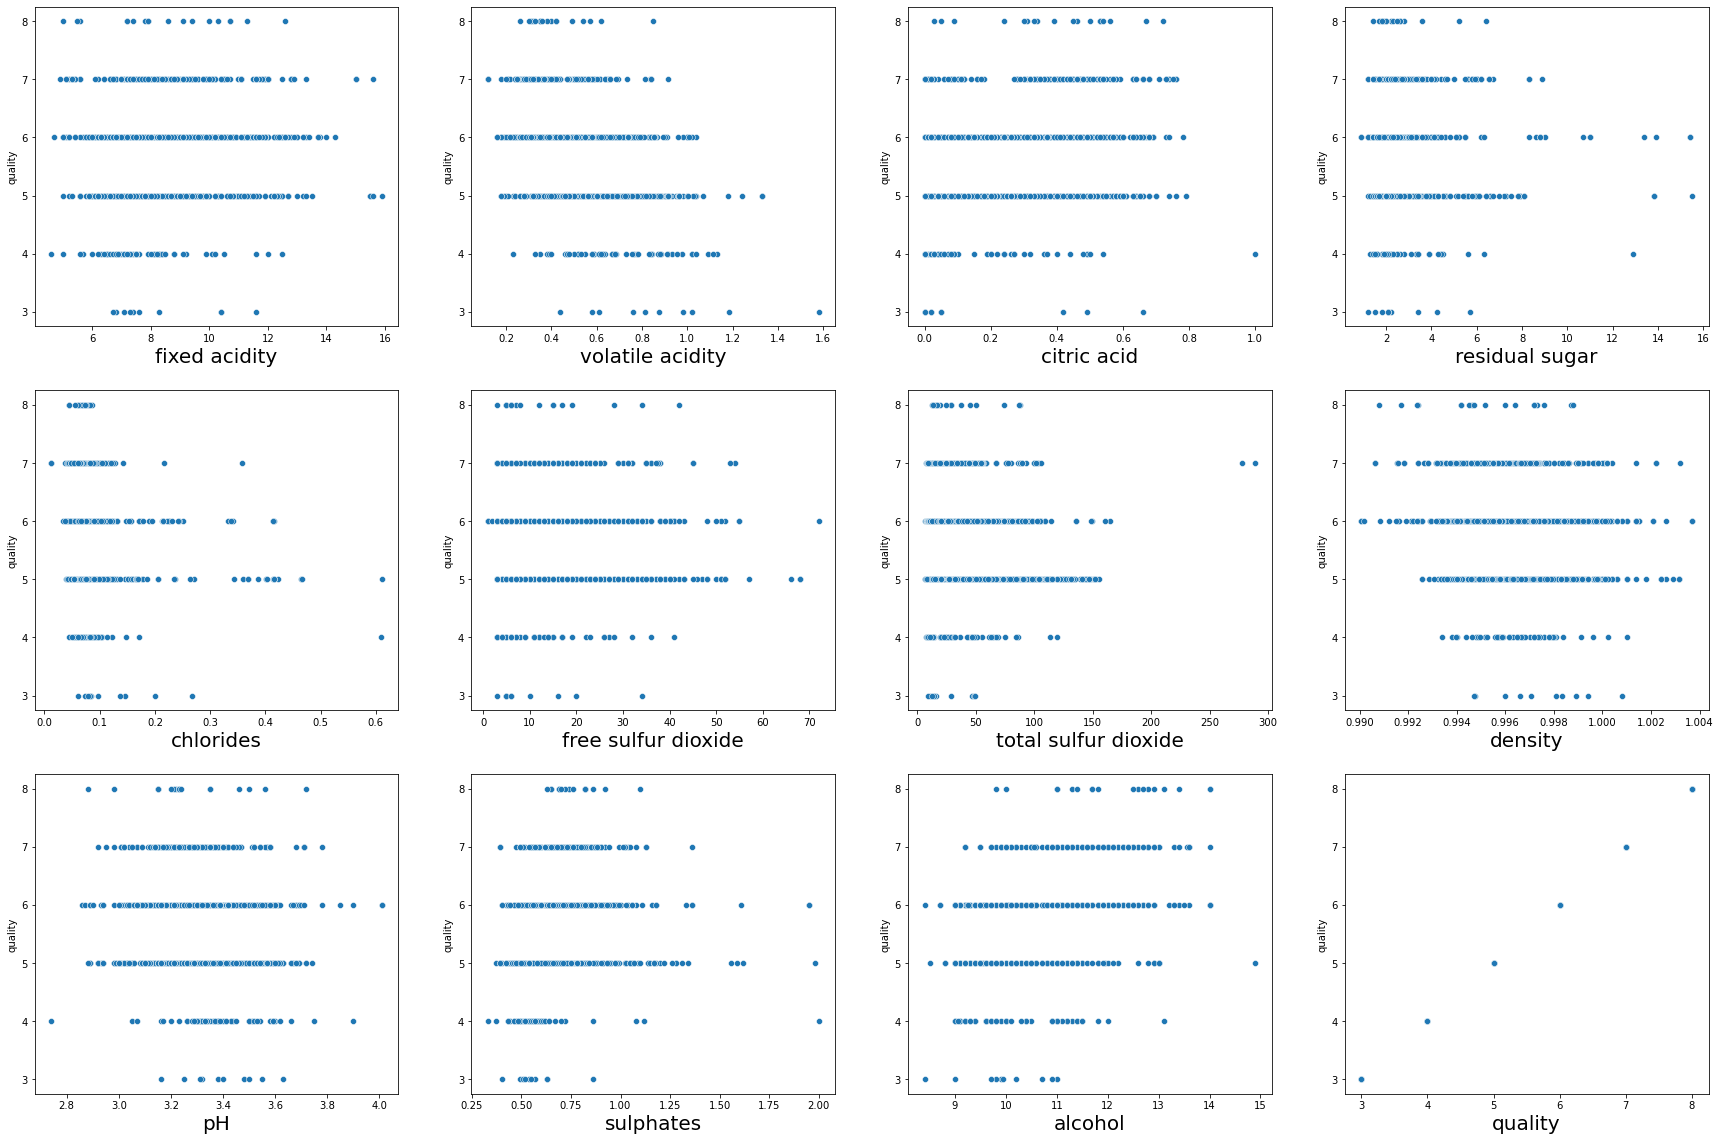

In [18]:
plt.figure(figsize=(30,20))

plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.scatterplot(df[column],df['quality'])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
    
plt.show()

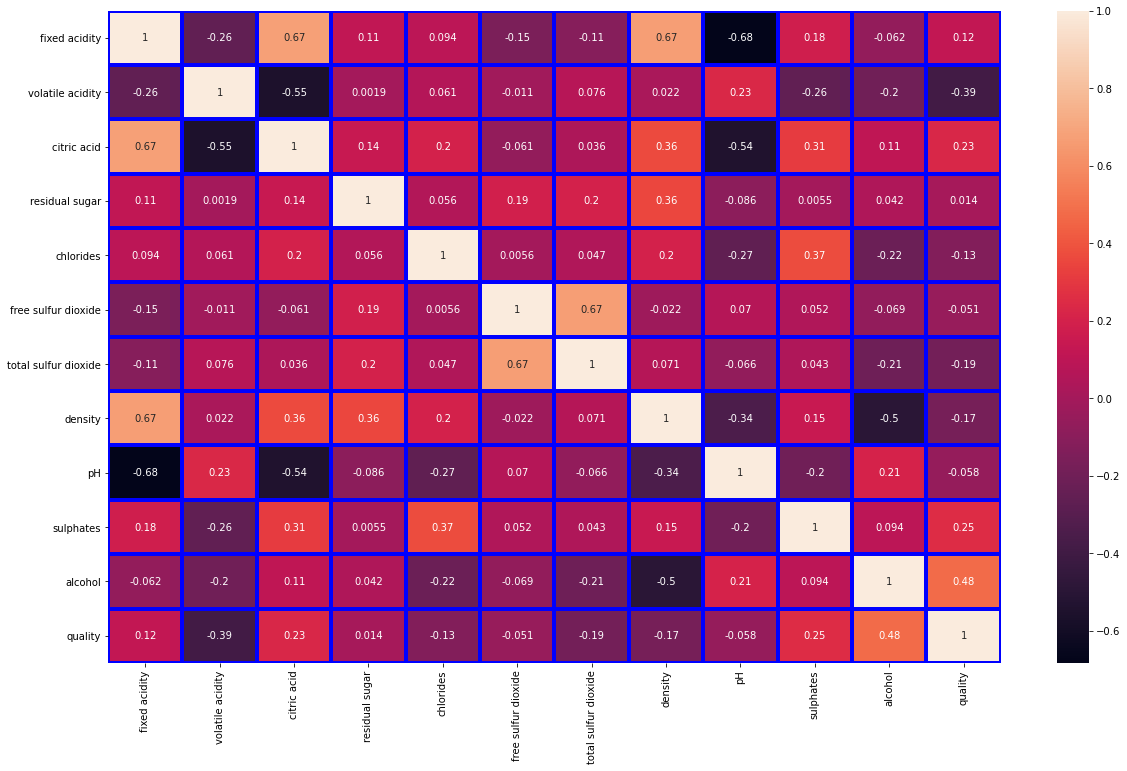

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot = True, linecolor = 'blue', linewidth = 3)
plt.show()

Inferences:

Quality has a strong positive co-relation with:

1. Alcohol - 0.48

2. Sulphates - 0.25

3. Citric Acid - 0.23

Quality has a strong negative co-relation with:

1. Volatile acidity - -0.39

Multicolinearity Observations:

1. Strong Corelation between Fixed Acidity and Citric Acid

2. Total Sulphur Dioxide and Free Sulphur Dioxide

3. Fxed acidity and Density

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

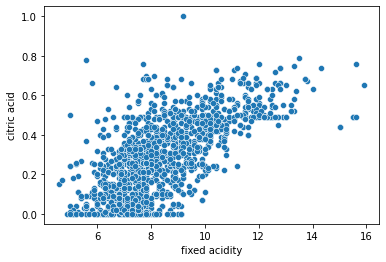

In [20]:
sns.scatterplot(df['fixed acidity'],df['citric acid'])

There seems to be corelation between the 2 features, however, it is not conclusive.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

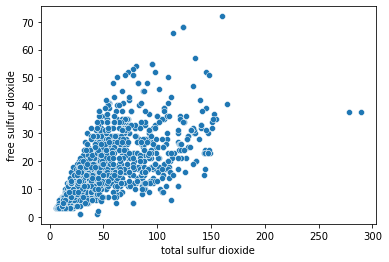

In [21]:
sns.scatterplot(df['total sulfur dioxide'],df['free sulfur dioxide'])

There seems to be corelation between the 2 features, however, it is not conclusive.

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

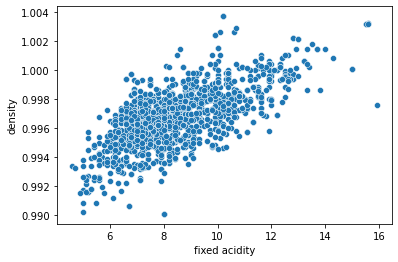

In [22]:
sns.scatterplot(df['fixed acidity'],df['density'])

There seems to be corelation between the 2 features, however, it is not conclusive.

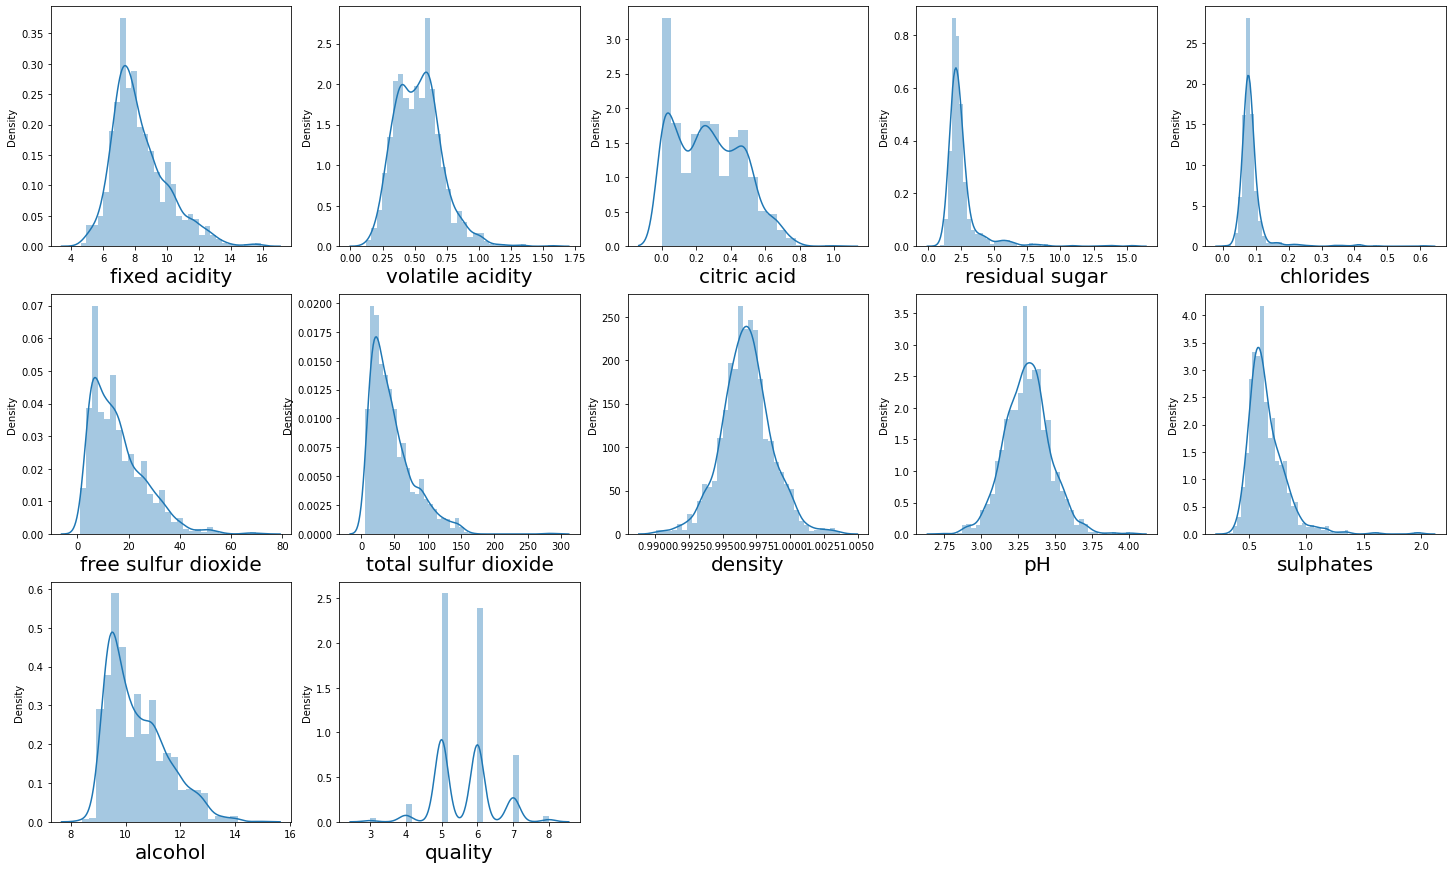

In [23]:
plt.figure(figsize = (25,15))

plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
    
plt.show()

In [24]:
x = df.drop(columns = ['quality'])
y = df['quality']

In [25]:
from sklearn.preprocessing import PowerTransformer

In [26]:
pt = PowerTransformer(method = 'yeo-johnson', standardize = True)

In [27]:
x1 = pt.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x1,y, test_size = 0.25, random_state = 40)

# Logistic Regression 

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(x_train, y_train)

LogisticRegression()

In [34]:
y_pred_lr = lr.predict(x_test)

In [35]:
print(accuracy_score(y_test, y_pred_lr))

0.605


# KNN Model

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred_knn = knn.predict(x_test)

In [39]:
print(accuracy_score(y_test,y_pred_knn))

0.5925


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {'algorithm':['kdtree','brute'],'leaf_size':[4,5,6,7,8,9,10,11,12],'n_neighbors':[5,6,7,8,9,10]}

In [42]:
grd_src = GridSearchCV(estimator = knn, param_grid = parameters)

In [43]:
grd_src.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_neighbors': [5, 6, 7, 8, 9, 10]})

In [44]:
grd_src.best_params_

{'algorithm': 'brute', 'leaf_size': 4, 'n_neighbors': 8}

In [45]:
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size = 4, n_neighbors = 8)

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=4, n_neighbors=8)

In [47]:
y_pred_kncv = knn.predict(x_test)

In [48]:
print(accuracy_score(y_test,y_pred_kncv))

0.5675


# Decision Tree Classifier

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred_dt = dt.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred_dt)

0.66

In [53]:
import pickle

In [54]:
filename = 'wine.pkl'

pickle.dump(lr,open(filename,'wb'))